# Equilibrium Bid & Ask

# Visualizaciones y Comparaciones: Copeland & Galai vs. Roll


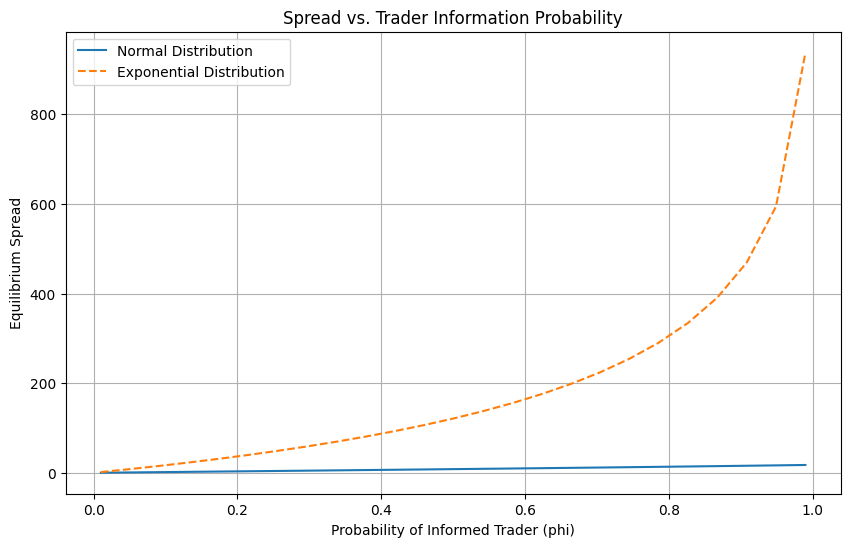

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon
from technical_analysis.utils import cope_galai_cal

# Se prueba con diferentes valores de phis para ver cómo el spread cambia
phis = np.linspace(0.01, 0.99, 25)

# Se guardan los spreads en listas
spread_norm = []
spread_exp = []

# Parámetros para las distribuciones
# Media
mu = 100

# DesvEst
sigma = 10

# Valor lambda
lambda_val = 0.01

# Instancia del modelo en utils.py
model = cope_galai_cal()

# Calcular spreads para diferentes valores de phi
for phi in phis:
    # No guardamos nada en ask o bid debido a que solo nos interesa saber cómo cambia el spread
    _, _, s_norm = model.bid_ask_norm_dist(mu=mu, sigma=sigma, pi=phi)
    spread_norm.append(s_norm)

    _, _, s_exp = model.bid_ask_exp_dist(lambda_value=lambda_val, pi=phi)
    spread_exp.append(s_exp)

# Graficar
plt.figure(figsize=(10,6))
plt.plot(phis, spread_norm, label='Normal Distribution')
plt.plot(phis, spread_exp, label='Exponential Distribution', linestyle='--')
plt.xlabel('Probability of Informed Trader (phi)')
plt.ylabel('Equilibrium Spread')
plt.title('Spread vs. Trader Information Probability')
plt.legend()
plt.grid(True)
plt.show()


"""
### Conclusión Comparativa

- En ambos modelos, el spread aumenta conforme la probabilidad de que el trader esté informado aumenta (phi incrementa).
- La distribución **exponencial** genera spreads más amplios que la **normal**, especialmente cuando phi es alta. Esto se debe a que la cola larga de la exponencial incrementa la asimetría informativa.

### Relación con Roll
- El modelo de Roll estima el spread a partir de la autocovarianza de los precios y **asume eficiencia del mercado** sin distinguir entre traders informados o no.
- Copeland & Galai, en cambio, **modelan explícitamente el comportamiento estratégico de los traders** y el spread como protección contra riesgo informacional.

### Aplicación práctica
- Este modelo puede ser usado en *market making algorítmico* para ajustar dinámicamente los precios bid/ask según la liquidez y la sospecha de trading informado.
"""